In [1]:
#!pip install keras
#!pip install tensorflow
#!pip install autokeras
#!pip install Pillow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
folder = "../data/SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/PanelImages"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

In [4]:
def printImages(x, y, number):
    plt.imshow(x[number], interpolation='nearest')
    plt.show()
    print(y[number])

In [5]:
def read_and_normalize_train_data(image_number=1000):
    onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    onlyfiles = onlyfiles[0:image_number]
    train_data, train_target = load_train(onlyfiles)
    train_data = np.array(train_data, dtype=np.float32)
    #train_target = np.array(train_target, dtype=np.float32)
    #m = train_data.mean()
    #s = train_data.std()

    #print ('Train mean, sd:', m, s )
    #train_data -= m
    #train_data /= s
    print('Train shape:', train_data.shape)
    print(train_data.shape[0], 'train samples')
    return train_data, train_target

In [155]:
def dataGenerator(onlyfiles=onlyfiles, batch_size=4):
    #print('Read train images')
    c = 0
    while(True):
        x = np.zeros((batch_size, 192, 192, 3)).astype('float')
        y = np.zeros((batch_size, 1)).astype('float')
        i=0
        onlyfiles = onlyfiles[0:batch_size]
        for _file in onlyfiles:
            target = (np.float64(_file.split('_')[11]))     
            img = load_img(folder + "/" + _file)  # this is a PIL image
            features = img_to_array(img)  
            #X_train[i] = x
            x[i-c] = img
            y[i-c] = target
            i += i
          #  if i % 250 == 0:
          #      print("%d images to array" % i)
            #print (x, y)
        yield x, y

In [156]:
def dataGeneratorCoco(images, coco, folder, 
                      input_image_size=(128,128), batch_size=4, mode='train'):
    """[summary]

    Args:
        images ([type]): [description]
        coco ([type]): [description]
        folder ([type]): [description]
        input_image_size (tuple, optional): [description]. Defaults to (128,128).
        batch_size (int, optional): [description]. Defaults to 4.
        mode (str, optional): [description]. Defaults to 'train'.

    Yields:
        [type]: [description]
    """
    
    img_folder = '{}/'.format(folder)
    dataset_size = len(images)
    catIds = coco.getCatIds()
    x = input_image_size[0]
    y = input_image_size[1]
    
    c = 0
    while(True):
        img = np.zeros((batch_size, x, y, 3)).astype('float')
        mask = np.zeros((batch_size, x, y, 1)).astype('float')

        for i in range(c, c+batch_size): #initially from 0 to batch_size, when c = 0
            train_mask = []
            #print(i)
            
            imageObj = images[i]
            #print(imageObj)
            
            #print('images loaded')
            try :
                imageObj['width'] = x
                imageObj['height'] = y
            except :
                #print(imageObj)
                print("not able to set the images size")
            
            ### Retrieve Image ###
            train_img = getImage(imageObj, img_folder, input_image_size)
            
            train_mask = getBinaryMask(imageObj, coco, catIds, input_image_size, x, y)
            
            # Add to respective batch sized arrays
            img[i-c] = train_img
            mask[i-c] = train_mask
            
        #print("end loop")
        c+=batch_size
        #print(c)
        if(c + batch_size >= dataset_size):
            c=0
            random.shuffle(images)
        yield img, mask


In [157]:
gen = dataGeneratorCoco()

TypeError: dataGeneratorCoco() missing 3 required positional arguments: 'images', 'coco', and 'folder'

In [158]:
gen = dataGenerator(onlyfiles, batch_size=4)
x,y = next(gen)
x.shape

(4, 192, 192, 3)

In [159]:
gen

<generator object dataGenerator at 0x0000028D0BEE93C8>

In [160]:
def gen_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(192, 192, 3)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),        
      tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

    return model

In [161]:
#x, y = load_train(onlyfiles)

In [162]:
def our_generator():
    x, y = dataGenerator(onlyfiles)
    return x,y

In [163]:
training_set = tf.data.Dataset.from_generator(
    our_generator,
    output_types = (tf.float32, tf.float32),
    output_shapes = (
          tf.TensorShape([None, 192, 192, 3]), 
          tf.TensorShape([None, 1])
    ))

In [164]:
training_set = tf.data.Dataset.from_generator(lambda: callable_iterator(gen),
    output_types = (tf.float32, tf.float32),
    output_shapes = (
          tf.TensorShape([None, 192, 192, 3]), 
          tf.TensorShape([None, 1])
    ))


In [340]:
N_BATCHES = 1
BATCH_SIZE = 1
N_FEATURES = 1


def get_data_generator(n_batches, batch_size, n_features):
    """Get a generator returning n_batches random data.

    The shape of the data is (batch_size, n_features).
    """

    def dataGenerator(onlyfiles=onlyfiles, batch_size=1):
        #print('Read train images')
        c = 0
        while(True):
            x = np.zeros((batch_size, 192, 192, 3)).astype('float')
            y = np.zeros((batch_size, 1)).astype('float')
            i=0
            onlyfiles = onlyfiles[0:1]
            for _file in onlyfiles:
                target = (np.float64(_file.split('_')[11]))     
                img = load_img(folder + "/" + _file)  # this is a PIL image
                features = img_to_array(img)  
                #X_train[i] = x
                x[i-c] = img
                y[i-c] = target
                i += i
              #  if i % 250 == 0:
              #      print("%d images to array" % i)
                #print (x, y)
            #c+=batch_size
            yield img, target

    return dataGenerator

In [341]:
    def dataGenerator(onlyfiles=onlyfiles, batch_size=1):
        #print('Read train images')
        c = 0
        while(True):
            x = np.zeros((batch_size, 192, 192, 3)).astype('float')
            y = np.zeros((batch_size, 1)).astype('float')
            i=0
            onlyfiles = onlyfiles[0:1]
            for _file in onlyfiles:
                target = (np.float64(_file.split('_')[11]))     
                img = load_img(folder + "/" + _file)  # this is a PIL image
                features = img_to_array(img)  
                #X_train[i] = x
                x[i-c] = img
                y[i-c] = target
                i += i
              #  if i % 250 == 0:
              #      print("%d images to array" % i)
                #print (x, y)
            yield img, target

In [342]:
x, y= next(dataGenerator())
y

0.906153208302

In [348]:
dataset = tf.data.Dataset.from_generator(
    get_data_generator(N_BATCHES, BATCH_SIZE, N_FEATURES),
    output_types=(tf.float32, tf.float32),
    output_shapes = (
          tf.TensorShape([192, 192, 3]), 
          tf.TensorShape([])
    )
).batch(BATCH_SIZE)

In [349]:
dataset

<BatchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.float32)>

In [350]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [351]:
# Initialize the image regressor.
reg = ak.ImageRegressor(
    overwrite=True,
    max_trials=10)


In [352]:
# Feed the image regressor with training data.
reg.fit(dataset,
        #validation_data=(X_val, y_val),
        batch_size=1,
        callbacks=[tensorboard_callback],
        epochs=10)

KeyboardInterrupt: 

In [326]:
dataset

<BatchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.float32)>

In [24]:
nr_images = 1000

In [25]:
folder = "../data/SolarPanelSoilingImageDataset/Solar_Panel_Soiling_Image_dataset/PanelImages"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

In [26]:
onlyfiles = onlyfiles[0:nr_images]

In [27]:
print(len(onlyfiles))

1000


solar_Fri_Jun_16_10__12__44_2017_L_0.894957983193_I_0.2996.jpg


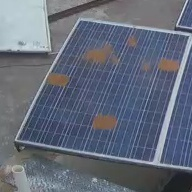

solar_Fri_Jun_16_10__12__49_2017_L_0.894957983193_I_0.2996.jpg


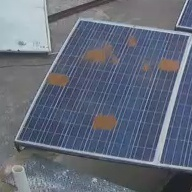

In [28]:
for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [29]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = np.ndarray(len(onlyfiles))
i=0


In [30]:
for _file in onlyfiles:
    train_files.append(_file)
    y_train[i] = (np.float64(_file.split('_')[11]))    
    i += 1
print("Files in train_files: %d" % len(train_files))

Files in train_files: 1000


In [31]:
_file.split('_')[11]

'0.516928893413'

In [32]:
#float(_file[label_in_file_start+2:label_in_file_start+label_in_file_number+4])

In [33]:
# Original Dimensions
image_width = 192
image_height = 192
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

In [34]:
len(train_files)

1000

In [35]:
i = 0

for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((3, 48, 48))
    # Normalize
    #x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
750 images to array
1000 images to array
All images to array!


In [36]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 800, Val set size: 100, Test set size: 100


In [137]:
# Initialize the image regressor.
reg = gen_model()


In [92]:
X_train.shape

(800, 192, 192, 3)

In [93]:
y_train.shape

(800,)

In [94]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [96]:
# Feed the image regressor with training data.
reg.fit(gen, 
        batch_size=1,
        #callbacks=[tensorboard_callback],
        epochs=10)

Epoch 1/10
     60/Unknown - 11s 178ms/step - loss: 8884899.0000 - mean_squared_error: 8884899.0000 - mean_absolute_error: 573.0261 - mean_absolute_percentage_error: 5423678.5000  - 3s 177ms/step - loss: 30519768.0000 - mean_squared_error: 30519768.0000 - mean_absolute_error: 1461 - 9s 177ms/step - loss: 10655791.0000 - mean_squared_error: 10655791.0000 - mean_absolute_error: 672.6359 - mean_absolute_percentage_error:

KeyboardInterrupt: 

In [ ]:
reg.export_model()

In [ ]:
# Predict with the best model.
predicted_y = reg.predict(X_test, batch_size=25)
print(predicted_y)



In [ ]:
# Evaluate the best model with testing data.
best_model = reg.evaluate(X_test, y_test, batch_size=25, verbose=1)

In [ ]:
best_model

In [ ]:
reg.metrics_names()

In [ ]:
help(reg)